In [222]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd

# Read csv files
city_data = pd.read_csv("../Pyber/raw_data/city_data.csv")
city_df = pd.DataFrame(city_data)

ride_data = pd.read_csv("../Pyber/raw_data/ride_data.csv")
ride_df = pd.DataFrame(ride_data)

# Check ride data count
ride_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [223]:
# Merge both dataframes
merge_df = pd.merge(ride_df, city_df, how="left", on=["city"])

# View merged dataframe
merge_df.head(10)

,city,date,fare,ride_id,driver_count,type
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942,35,Urban
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587,55,Urban
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892,68,Urban
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673,8,Urban
5,New Jeffrey,2016-02-22 18:36:25,36.01,9757888452346,58,Urban
6,Port Johnstad,2016-06-07 02:39:58,17.15,4352278259335,22,Urban
7,Jacobfort,2016-09-20 20:58:37,22.98,1500221409082,52,Urban
8,Travisville,2016-01-15 17:32:02,27.39,850152768361,37,Urban
9,Sandymouth,2016-11-16 07:27:00,21.61,2389035050524,11,Urban


In [224]:
# Check data count of merged data
merge_df.count()

city            2407
date            2407
fare            2407
ride_id         2407
driver_count    2407
type            2407
dtype: int64

In [225]:
# Look for duplicate value
city_df["city"].value_counts()

Port James              2
Anitamouth              1
North Tara              1
Eriktown                1
Port Guytown            1
New Lynn                1
Hernandezshire          1
West Alexis             1
West Peter              1
South Roy               1
Lake Brenda             1
West Jefferyfurt        1
Carrollbury             1
Lake Jennaton           1
West Paulport           1
Sandymouth              1
Kyleton                 1
Williamshire            1
Lisatown                1
Kellershire             1
Alyssaberg              1
New Jessicamouth        1
West Sydneyhaven        1
North Tracyfort         1
Kelseyland              1
Antoniomouth            1
Horneland               1
Conwaymouth             1
West Brittanyton        1
Kennethburgh            1
                       ..
New Michelleberg        1
Maryside                1
New Brandonborough      1
Carrollfort             1
Thomastown              1
Fosterside              1
Torresshire             1
Port Josephf

In [226]:
# Obtain rows for duplicated value
city_df[city_df["city"] == "Port James"]

,city,driver_count,type
84,Port James,15,Suburban
100,Port James,3,Suburban


In [227]:
# Remove duplicate from data
city_cleanup = city_df[city_df.city != "Port James"]
port_james = pd.DataFrame({"city": "Port James", "driver_count": 18, "type": "Suburban"}, index=[0])
city_dfs = [city_cleanup, port_james]
city_new = pd.concat(city_dfs)

# Check for updated value
city_new[city_new["city"] == "Port James"]

,city,driver_count,type
0,Port James,18,Suburban


In [228]:
# Merge corrected data
merge_cleanup = pd.merge(ride_df, city_new, how="left", on=["city"])

# Check data count
merge_cleanup.count()

city            2375
date            2375
fare            2375
ride_id         2375
driver_count    2375
type            2375
dtype: int64

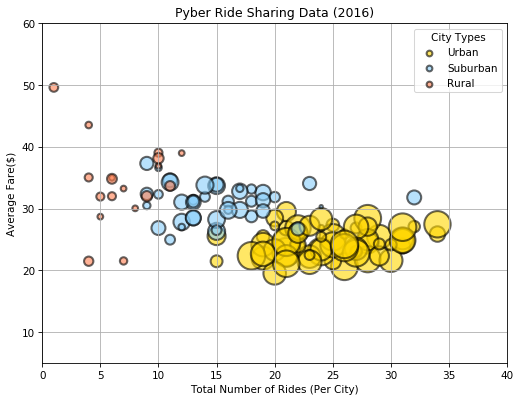

In [229]:
# Split dataframe by city types
urban_data = merge_cleanup.loc[merge_cleanup["type"] == "Urban"]
suburban_data = merge_cleanup.loc[merge_cleanup["type"] == "Suburban"]
rural_data = merge_cleanup.loc[merge_cleanup["type"] == "Rural"]

# Calculate urban data
urban_avg_fare = urban_data.groupby(["city"]).mean()["fare"]
urban_ride_count = urban_data.groupby(["city"]).count()["ride_id"]
urban_num_drivers = urban_data.groupby(["city"]).max()["driver_count"]

# Calculate suburban data
suburban_avg_fare = suburban_data.groupby(["city"]).mean()["fare"]
suburban_ride_count = suburban_data.groupby(["city"]).count()["ride_id"]
suburban_num_drivers = suburban_data.groupby(["city"]).max()["driver_count"]

# Calculate rural data
rural_avg_fare = rural_data.groupby(["city"]).mean()["fare"]
rural_ride_count = rural_data.groupby(["city"]).count()["ride_id"]
rural_num_drivers = rural_data.groupby(["city"]).max()["driver_count"]

# Plot bubble chart
plt.figure(figsize=(8,6), dpi=75)
urban = plt.scatter(urban_ride_count, urban_avg_fare, marker="o", s=urban_num_drivers*10, facecolors="gold", alpha=0.6, 
                     linewidth=2, edgecolors="black", label="Urban")
suburban = plt.scatter(suburban_ride_count, suburban_avg_fare, marker="o", s=suburban_num_drivers*10, facecolors="lightskyblue", alpha=0.6, 
                     linewidth=2, edgecolors="black", label="Suburban")
rural = plt.scatter(rural_ride_count, rural_avg_fare, marker="o", s=rural_num_drivers*10, facecolors="coral", alpha=0.6, 
                     linewidth=2, edgecolors="black", label="Rural")

# Add title, labels, and legend
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare($)")
bubble_legend = plt.legend(handles=[urban, suburban, rural], title="City Types", loc="upper right")
bubble_legend.legendHandles[0]._sizes = [30]
bubble_legend.legendHandles[1]._sizes = [30]
bubble_legend.legendHandles[2]._sizes = [30]

# Format bubble chart for aesthetics
plt.grid()
plt.xlim(0,40)
plt.ylim(5,60)
plt.show()

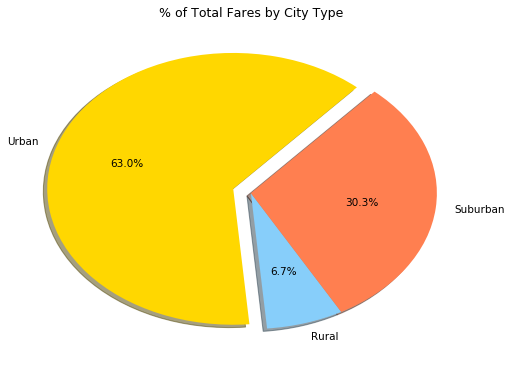

In [230]:
# % of total fares by city type
total_fares = merge_cleanup.groupby(["type"]).sum()["fare"]
colors = ["lightskyblue", "coral", "gold"]
explode = [0,0,0.1]
fare_labels = total_fares.keys()

# Plot pie chart
plt.figure(figsize=(8,6), dpi=75)
plt.pie(total_fares, labels=fare_labels, explode=explode, colors=colors, startangle=275, autopct="%1.1f%%", 
        shadow=True)

# Add title
plt.title("% of Total Fares by City Type")

plt.show()

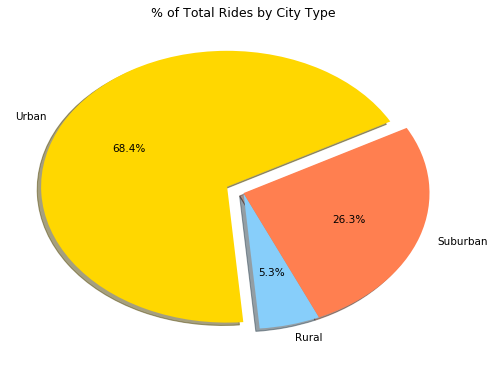

In [231]:
# % of total rides by city type
total_rides = merge_cleanup.groupby(["type"]).count()["ride_id"]
colors = ["lightskyblue", "coral", "gold"]
explode = [0,0,0.1]
rides_labels = total_rides.keys()

# Plot pie chart
plt.figure(figsize=(8,6), dpi=75)
plt.pie(total_rides, labels=rides_labels, explode=explode, colors=colors, startangle=275, autopct="%1.1f%%", 
        shadow=True)

# Add title
plt.title("% of Total Rides by City Type")

plt.show()

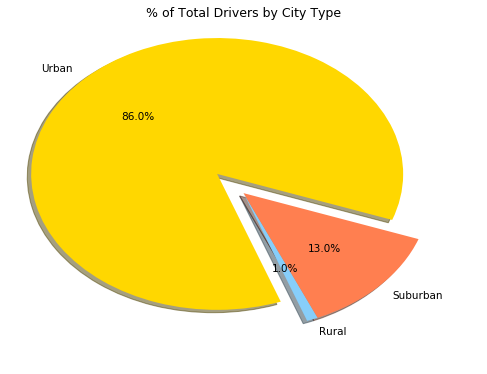

In [232]:
# % of total drivers by city type
total_drivers = merge_cleanup.groupby(["type"]).sum()["driver_count"]
colors = ["lightskyblue", "coral", "gold"]
explode = [0,0,0.2]
drivers_labels = total_drivers.keys()

# Plot pie chart
plt.figure(figsize=(8,6), dpi=75)
plt.pie(total_drivers, labels=drivers_labels, explode=explode, colors=colors, startangle=290, autopct="%1.1f%%", 
        shadow=True)

# Add title
plt.title("% of Total Drivers by City Type")

plt.show()

In [233]:
# Three observable trends based on the data:
    
    # 1) There's significantly more drivers in urban cities than suburban and rural cities.
    
    # 2) The average fare for urban cities generally ranges between $20-$30.
    
    # 3) There's a rural city that logged both the fewest rides and the highest average fare (~50). This city is most
    #    likely very distant from urban areas that patrons would avoid using the ride sharing service due to high
    #    fares and distance.